In [ ]:
# !pip install -r requirements.txt

In [ ]:
!unzip EfficientNet-PyTorch-3D.zip 

Archive:  EfficientNet-PyTorch-3D.zip
   creating: EfficientNet-PyTorch-3D/
  inflating: EfficientNet-PyTorch-3D/LICENSE  
  inflating: __MACOSX/EfficientNet-PyTorch-3D/._LICENSE  
  inflating: EfficientNet-PyTorch-3D/README.md  
  inflating: __MACOSX/EfficientNet-PyTorch-3D/._README.md  
   creating: EfficientNet-PyTorch-3D/efficientnet_pytorch_3d/
  inflating: __MACOSX/EfficientNet-PyTorch-3D/._efficientnet_pytorch_3d  
  inflating: EfficientNet-PyTorch-3D/setup.py  
  inflating: __MACOSX/EfficientNet-PyTorch-3D/._setup.py  
  inflating: EfficientNet-PyTorch-3D/example.py  
  inflating: __MACOSX/EfficientNet-PyTorch-3D/._example.py  
  inflating: EfficientNet-PyTorch-3D/efficientnet_pytorch_3d/__init__.py  
  inflating: __MACOSX/EfficientNet-PyTorch-3D/efficientnet_pytorch_3d/.___init__.py  
  inflating: EfficientNet-PyTorch-3D/efficientnet_pytorch_3d/model.py  
  inflating: __MACOSX/EfficientNet-PyTorch-3D/efficientnet_pytorch_3d/._model.py  
  inflating: EfficientNet-PyTorch-3D/eff

In [ ]:
!wget -nc "https://www.dropbox.com/s/2bdx240kfwi7rbb/FLAIR-e10-loss0.680-auc0.624.pth"
!wget -nc "https://raw.githubusercontent.com/georgia-tech-db/eva/master/tutorials/00-start-eva-server.ipynb"
%run 00-start-eva-server.ipynb
cursor = connect_to_server()

File ‘FLAIR-e10-loss0.680-auc0.624.pth’ already there; not retrieving.

File ‘00-start-eva-server.ipynb’ already there; not retrieving.

nohup eva_server > eva.log 2>&1 &


In [ ]:
cursor.execute("""DROP UDF MRIClassifier;""")
response = cursor.fetch_all()
print(response)

cursor.execute("""CREATE UDF IF NOT EXISTS 
                  MRIClassifier
                  INPUT (frame NDARRAY UINT8(3, ANYDIM, ANYDIM)) 
                  OUTPUT (results NDARRAY FLOAT32(ANYDIM, ANYDIM)) 
                  TYPE  Classification 
                  IMPL 'CustomModel.py';
        """)
        
response = cursor.fetch_all()
print(response)

@status: ResponseStatus.SUCCESS
@batch: 
                                         0
0  UDF MRIClassifier successfully dropped
@query_time: 0.03811689999997725
@status: ResponseStatus.SUCCESS
@batch: 
                                                        0
0  UDF MRIClassifier successfully added to the database.
@query_time: 2.3074074080000173


In [ ]:
cursor.execute("DROP TABLE test;")
response = cursor.fetch_all()
print(response)

@status: ResponseStatus.SUCCESS
@batch: 
                                   0
0  Table Successfully dropped: test
@query_time: 0.06313539699999637


In [ ]:
cursor.execute("LOAD IMAGE 'test1.png' INTO test;")
response = cursor.fetch_all()
print(response)
cursor.execute("LOAD IMAGE 'test2.png' INTO test;")
response = cursor.fetch_all()
print(response)
cursor.execute("LOAD IMAGE 'test3.png' INTO test;")
response = cursor.fetch_all()
print(response)
cursor.execute("LOAD IMAGE 'test4.png' INTO test;")
response = cursor.fetch_all()
print(response)
cursor.execute("LOAD IMAGE 'test5.png' INTO test;")
response = cursor.fetch_all()
print(response)
cursor.execute("LOAD IMAGE 'test6.png' INTO test;")
response = cursor.fetch_all()
print(response)

@status: ResponseStatus.SUCCESS
@batch: 
                            0
0  Number of loaded IMAGE: 1
@query_time: 0.18629566900000327
@status: ResponseStatus.SUCCESS
@batch: 
                            0
0  Number of loaded IMAGE: 1
@query_time: 0.03284076300002425
@status: ResponseStatus.SUCCESS
@batch: 
                            0
0  Number of loaded IMAGE: 1
@query_time: 0.02995881399999689
@status: ResponseStatus.SUCCESS
@batch: 
                            0
0  Number of loaded IMAGE: 1
@query_time: 0.02916266900001574
@status: ResponseStatus.SUCCESS
@batch: 
                            0
0  Number of loaded IMAGE: 1
@query_time: 0.03259438200001341
@status: ResponseStatus.SUCCESS
@batch: 
                            0
0  Number of loaded IMAGE: 1
@query_time: 0.03877593100003196


In [ ]:
cursor.execute("""SELECT data, MRIClassifier(data)
                  FROM test """)
response = cursor.fetch_all()
print(response.batch)

                                                                                             test.data  \
0  [[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0 0]\n [0 0 0]\n [0 0 0]], [[0 0 0]\n [0 0 0]\n [0 0 0]...   
1  [[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0 0]\n [0 0 0]\n [0 0 0]], [[0 0 0]\n [0 0 0]\n [0 0 0]...   
2  [[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0 0]\n [0 0 0]\n [0 0 0]], [[0 0 0]\n [0 0 0]\n [0 0 0]...   
3  [[[0 0 0]\n [0 0 0]\n [0 0 0]\n [0 0 0]\n [0 0 0]\n [0 0 0]\n [0 0 0]\n [0 0 0]\n [0 0 0]\n [0 0...   
4  [[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0 0]\n [0 0 0]\n [0 0 0]], [[0 0 0]\n [0 0 0]\n [0 0 0]...   
5  [[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0 0]\n [0 0 0]\n [0 0 0]], [[0 0 0]\n [0 0 0]\n [0 0 0]...   

   mriclassifier.results  
0                    1.0  
1                    1.0  
2                    1.0  
3                    0.0  
4                    0.0  
5                    1.0  


In [ ]:
!import numpy as np


/bin/bash: import: command not found


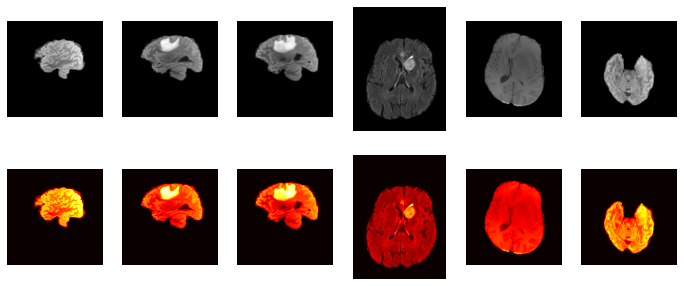

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch 

fig, ax = plt.subplots(nrows=2, ncols=6, figsize=[15,18])

df = response.batch.frames
for i in range(len(df)):
  x_np = torch.from_numpy(df['test.data'].iloc[i])
  img = df['test.data'].iloc[i]
  ax[0,i].imshow(img)
  ax[1,i].imshow(x_np.squeeze()[:,:,0], cmap=plt.cm.hot)
  ax[0,i].axis('off')
  ax[1,i].axis('off')
plt.gcf().set_size_inches(12, 5)
plt.show()